# Data Cleaning
Aqui vamos realizar toda a etapa de limpeza dos dados para nossa analise de dados



# Importando bibliotecas


In [1]:
# bibliotecas
import numpy as np
import pandas as pd
import datetime

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import altair as alt


# Importar os conjuntos de dados

In [2]:
# importar os conjuntos de dados

# game: Reúne os registros de cada jogo no conjunto de dados
game = pd.read_csv("nhl_datasets/game.csv")

# game_golie_stats: As estatísticas dos goleiros que participaram dos jogos
game_golie_stats = pd.read_csv("nhl_datasets/game_goalie_stats.csv")

# game_teams_stats: As estatísticas básicas das equipes. Cada jogo terá duas entradas nesta tabela, uma para cada equipe
game_teams_stats = pd.read_csv("nhl_datasets/game_teams_stats.csv")

# player_info: Informações sobre os jogadores
player_info = pd.read_csv("nhl_datasets/player_info.csv")

# team_info: informação sobre as equipes
team_info = pd.read_csv("nhl_datasets/team_info.csv")

## Primeiras entradas

In [3]:
game.head(3)

,game_id,season,type,date_time,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz
0,2011030221,20112012,P,2012-04-29,2012-04-29T19:00:00Z,1,4,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
1,2011030222,20112012,P,2012-05-01,2012-05-01T23:30:00Z,1,4,4,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
2,2011030223,20112012,P,2012-05-03,2012-05-03T23:30:00Z,4,1,3,4,home win OT,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT


In [4]:
game.dtypes

game_id                    int64
season                     int64
type                      object
date_time                 object
date_time_GMT             object
away_team_id               int64
home_team_id               int64
away_goals                 int64
home_goals                 int64
outcome                   object
home_rink_side_start      object
venue                     object
venue_link                object
venue_time_zone_id        object
venue_time_zone_offset     int64
venue_time_zone_tz        object
dtype: object

In [5]:
team_info.head(3)

,team_id,franchiseId,shortName,teamName,abbreviation,link
0,1,23,New Jersey,Devils,NJD,/api/v1/teams/1
1,4,16,Philadelphia,Flyers,PHI,/api/v1/teams/4
2,26,14,Los Angeles,Kings,LAK,/api/v1/teams/26


In [6]:
team_info.dtypes

team_id          int64
franchiseId      int64
shortName       object
teamName        object
abbreviation    object
link            object
dtype: object

In [7]:
game_teams_stats.head(3)

,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways
0,2011030221,1,away,False,OT,Peter DeBoer,3,26,31,12,3,1,44.9,6,7
1,2011030221,4,home,True,OT,Peter Laviolette,4,36,27,6,6,1,55.1,13,4
2,2011030222,1,away,True,REG,Peter DeBoer,4,35,32,12,4,0,50.9,8,7


In [8]:
game_teams_stats.dtypes

game_id                     int64
team_id                     int64
HoA                        object
won                          bool
settled_in                 object
head_coach                 object
goals                       int64
shots                       int64
hits                        int64
pim                         int64
powerPlayOpportunities      int64
powerPlayGoals              int64
faceOffWinPercentage      float64
giveaways                   int64
takeaways                   int64
dtype: object

In [9]:
player_info.head()

,player_id,firstName,lastName,nationality,birthCity,primaryPosition,birthDate,link
0,8467412,Alexei,Ponikarovsky,UKR,Kiev,LW,1980-04-09,/api/v1/people/8467412
1,8468501,Anton,Volchenkov,RUS,Moscow,D,1982-02-25,/api/v1/people/8468501
2,8459670,Kimmo,Timonen,FIN,Kuopio,D,1975-03-18,/api/v1/people/8459670
3,8471233,Travis,Zajac,CAN,Winnipeg,C,1985-05-13,/api/v1/people/8471233
4,8455710,Martin,Brodeur,CAN,Montreal,G,1972-05-06,/api/v1/people/8455710


In [10]:
player_info.dtypes

player_id           int64
firstName          object
lastName           object
nationality        object
birthCity          object
primaryPosition    object
birthDate          object
link               object
dtype: object

In [11]:
game_golie_stats.head()

,game_id,player_id,team_id,timeOnIce,assists,goals,pim,shots,saves,powerPlaySaves,shortHandedSaves,evenSaves,shortHandedShotsAgainst,evenShotsAgainst,powerPlayShotsAgainst,decision,savePercentage,powerPlaySavePercentage,evenStrengthSavePercentage
0,2011030221,8455710,1,3876,0,0,0,36,32,7,0,25,0,28,8,L,88.888889,87.5,89.285714
1,2011030221,8468524,4,3876,0,0,0,26,23,4,5,14,5,16,5,W,88.461538,80.0,87.500000
2,2011030222,8455710,1,3599,0,0,0,20,19,1,3,15,3,16,1,W,95.000000,100.0,93.750000
3,2011030222,8468524,4,3559,0,0,0,34,31,6,0,25,0,28,6,L,91.176471,100.0,89.285714
4,2011030223,8468524,4,4623,0,0,0,31,27,1,1,25,1,28,2,L,87.096774,50.0,89.285714


In [12]:
game_golie_stats.dtypes

game_id                         int64
player_id                       int64
team_id                         int64
timeOnIce                       int64
assists                         int64
goals                           int64
pim                             int64
shots                           int64
saves                           int64
powerPlaySaves                  int64
shortHandedSaves                int64
evenSaves                       int64
shortHandedShotsAgainst         int64
evenShotsAgainst                int64
powerPlayShotsAgainst           int64
decision                       object
savePercentage                float64
powerPlaySavePercentage       float64
evenStrengthSavePercentage    float64
dtype: object

Nosso objetivo é preparar os conjuntos de dados para as nossas analises. Algumas das etapas que vamos realizar....


# Vamos relacionar os conjuntos de dados
Os conjuntos de dados que vamos relacionar são `game` com `game_team_stats` em cima da variavel `game_id`. Nosso novo conjunto de dados vai chamar `nhl_eda`. Ele vai ser nosso conjunto de dados principal onde vamos realizar nossas analises em cima dos times. Os outros conjuntos de dados `game_skater_stats` e `game_golie_stats` vao servir paras as analises dos jogadores.

In [13]:
# game com game_teams_stats
nhl_eda = pd.merge(game, game_teams_stats, on='game_id')

In [14]:
nhl_eda.head()

,game_id,season,type,date_time,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways
0,2011030221,20112012,P,2012-04-29,2012-04-29T19:00:00Z,1,4,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT,1,away,False,OT,Peter DeBoer,3,26,31,12,3,1,44.9,6,7
1,2011030221,20112012,P,2012-04-29,2012-04-29T19:00:00Z,1,4,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT,4,home,True,OT,Peter Laviolette,4,36,27,6,6,1,55.1,13,4
2,2011030222,20112012,P,2012-05-01,2012-05-01T23:30:00Z,1,4,4,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT,1,away,True,REG,Peter DeBoer,4,35,32,12,4,0,50.9,8,7
3,2011030222,20112012,P,2012-05-01,2012-05-01T23:30:00Z,1,4,4,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT,4,home,False,REG,Peter Laviolette,1,20,24,32,5,0,49.1,9,6
4,2011030223,20112012,P,2012-05-03,2012-05-03T23:30:00Z,4,1,3,4,home win OT,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT,4,away,False,OT,Peter Laviolette,3,28,28,4,5,1,50.8,2,1


# Preparando os dados
As variáveis: `away_team_id`, `home_team_id`, `team_id`, `player_id` categorizam os times e os jogadores através de números únicos (*id*) como mostrado nos conjuntos de dados [`team_info`, `player_info`]. Isso deixa nossas análises menos legíveis porque sempre vamos precisar recorrer a estes conjuntos de dados para identificar seus valores. Uma alternativa para essa questão e mapear esses números identificadores aos respectivos valores e substitui-los no conjunto de dados que vamos utilizar para nossa análise exploratória.

Existem diversas formas de abordar essa questão. No meu caro criarei um dicionário com a função `to_dict()`. Onde nossa chave (*key*) será o número identificador (*id*) e os valores (*value*) o nome do time ou jogador. Para substituir os valores vamos selecionar a coluna no conjunto de dados e chamar a função `replace()` passando como parâmetro nosso dicionário.

Para o dicionário que vai conter o nome dos jogadores, vamos criar uma coluna no conjunto de dados denominada `full_name` que vai ser a junção da variável `firstName` e `lastName`. Assim nosso o número identificador vai ficar associado ao nome completo do jogador. Realizaremos esse procedimento para evitar sobrenomes (`lastName`) iguais.


**Obs:. Para não criar confusão vamos trabalhar em um conjunto de dados por vez**

## Mapeando valores

In [15]:
# Dicionário dos times
team_dict = team_info.set_index('team_id')['teamName'].to_dict()


In [16]:
# criando coluna que vai conter o primeiro e o ultimo nome
player_info['player_name'] = player_info['firstName'] + " " + player_info['lastName']

# dict onde key=player-id e value=nome
player_dict = player_info.set_index('player_id')['player_name'].to_dict()


In [17]:
# nationality game_skater_stats
nation_dict = player_info.set_index('player_id')['nationality'].to_frame()

# position game_skater_stats
position = player_info.set_index('player_id')['primaryPosition'].to_frame()

## Conjunto de Dados `nhl_eda`

### Substituindo valores

In [18]:
# Substituindo valores 
nhl_eda['team_id'].replace(team_dict, inplace=True)
nhl_eda['away_team_id'].replace(team_dict, inplace=True)
nhl_eda['home_team_id'].replace(team_dict, inplace=True)


### Excluir colunas desnecessárias
Algumas colunas não serão necessárias para as nossas análises por serem redundantes. Vamos excluí-las

In [19]:
# selecionando colunas que seram excluidas
cols_drop = ['date_time_GMT', 'outcome', 'home_rink_side_start', 'venue', 'venue_link', 'venue_time_zone_id',
             'venue_time_zone_offset', 'venue_time_zone_tz']

# excluindo colunas 
nhl_eda = nhl_eda.drop(labels=cols_drop, axis=1)

### Mudando tipo dos dados

Outro ajuste interresante a se fazer diz respeito a coluna `date_time`. Isso porque o quando o carregamos os dados para o DataFrame o pandas pode interpretar os dados de forma incorreta. Como podemos ver nossa coluna `data_time` tem o tipo *object* (*strig*). Para converte-las e poder usar series temporais vamos utilizar a biblioteca *datetime*.

In [20]:
# mudando tipo da variavel date_time
for column in ['date_time']:
    nhl_eda[column] = pd.to_datetime(nhl_eda[column], errors='coerce')

### Criando novas colunas (*features*)

Vamos adicionar a coluna `outcome` ao nosso conjunto de dados nhl_eda que vai mapear e os dados da coluna `won`  e vai substituir `False` por `Lose` e `True` para `Win`. Depois vamos excluir a coluna `won` por ser tratar de uma coluna redundante.

In [21]:
# criando coluna resultado
nhl_eda['outcome'] = nhl_eda['won'].map({False:'Lose', True:'Win'})

# excluindo coluna redundante
nhl_eda.drop('won', axis=1, inplace=True)

Outra coluna que adicionaremos é a dos gols tomados (GA). Vamos seguir algumas etapas:
* Vamos criar uma lista com os nomes dos times;
* Criar um dicionário que vai armazenar os gols tomados. dict = {key} = nome do time : {value} = gols tomados
* Vamos realizar um loop for que vai iterar sobre os elementos da lista que criamos anteriormente.
    * Dentro do nosso loop ele vai criar um subset para cada time
    * Teremos duas variáveis gols_tomados_times_mandantes e gols_tomados_times_visitantes. A primeira variável vai armazenar os gols tomados quando o time está jogando como visitante e a outra variável quando o time esta jogando como mandante.
    * Isso vai criar dois objetos do tipo pd.Series que vamos concatenar utilizando a função pd.concat() que vamos transformar no tipo DataFrame com a função to_frame()
    * por ultimo vamos salvar nosso conjunto de dados ao nosso dicionário.
* Fora do loop vamos salvar todos os valores um uma lista e concatenar em um único DataFrame que será utilizado para gerar nossa coluna no conjunto de dados nhl_eda


In [22]:
# lista que vai conter nome dos times
team_list = nhl_eda['team_id'].unique()

# dicionario que vai armezenar nossos resultados
series = dict()

# laço for para iterar sobre cada valor da lista
for name in team_list:
    # cria o subset em cima do nome
    goals_filtered = nhl_eda[nhl_eda['team_id'] == name ]
    
    # filtrando gols tomados por times mandantes e criando um series orientado pelo indice
    gols_tomados_times_mandantes = goals_filtered[(goals_filtered['team_id'] == name ) & (goals_filtered['HoA'] == 'away') & 
                                           (goals_filtered['away_team_id']== name )]['home_goals']
    
    # filtrando gols tomados por times visitantes e criando um series orientado pelo indice
    gols_tomados_times_visitantes = goals_filtered[(goals_filtered['HoA']=='home') & (goals_filtered['team_id']== name) & 
                                            (goals_filtered['home_team_id']== name)]['away_goals']
    
    # concatenando as series criadas e convertando em DataFrame
    GA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')
    
    # armazenando testeGA ao nosso dict 
    series[name] = GA


    
list_values = list()
for values in series.values():
    list_values.append(values)
    
    
GA = pd.concat(list_values)

In [23]:
# combinando nosso conjunto de dados ao do gols tomados
nhl_eda = pd.concat([nhl_eda, GA], axis=1)

# excluindo colunas redundantes
nhl_eda.drop(['away_team_id','home_team_id','away_goals', 'home_goals'], axis=1, inplace=True)

In [24]:
# reordenando e renomeando colunas
nhl_eda = nhl_eda[['game_id', 'season', 'type', 'date_time', 'team_id','goals', 'GA',
                   'HoA','outcome','settled_in', 'head_coach', 'shots', 'hits', 'pim',
                   'powerPlayOpportunities', 'powerPlayGoals', 'faceOffWinPercentage','giveaways',
                   'takeaways']].rename(columns={'team_id':'team_name',
                                                 'goals':'GF'})

Nosso conjunto de dados ficou muito mais legivel agora.

In [25]:
nhl_eda.head(10)

,game_id,season,type,date_time,team_name,GF,GA,HoA,outcome,settled_in,head_coach,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways
0,2011030221,20112012,P,2012-04-29,Devils,3,4,away,Lose,OT,Peter DeBoer,26,31,12,3,1,44.9,6,7
1,2011030221,20112012,P,2012-04-29,Flyers,4,3,home,Win,OT,Peter Laviolette,36,27,6,6,1,55.1,13,4
2,2011030222,20112012,P,2012-05-01,Devils,4,1,away,Win,REG,Peter DeBoer,35,32,12,4,0,50.9,8,7
3,2011030222,20112012,P,2012-05-01,Flyers,1,4,home,Lose,REG,Peter Laviolette,20,24,32,5,0,49.1,9,6
4,2011030223,20112012,P,2012-05-03,Flyers,3,4,away,Lose,OT,Peter Laviolette,28,28,4,5,1,50.8,2,1
5,2011030223,20112012,P,2012-05-03,Devils,4,3,home,Win,OT,Peter DeBoer,31,30,10,2,1,49.2,11,4
6,2011030224,20112012,P,2012-05-06,Flyers,2,4,away,Lose,REG,Peter Laviolette,22,23,10,2,1,62.5,20,5
7,2011030224,20112012,P,2012-05-06,Devils,4,2,home,Win,REG,Peter DeBoer,43,19,4,5,1,37.5,5,3
8,2011030225,20112012,P,2012-05-08,Devils,3,1,away,Win,REG,Peter DeBoer,30,26,2,4,1,55.0,6,5
9,2011030225,20112012,P,2012-05-08,Flyers,1,3,home,Lose,REG,Peter Laviolette,28,38,8,1,0,45.0,14,7


Obs:
* Nos Gols Tomados estao incluidos as derrotas no shoot-out, mas apenas o numero de derrotas e nao o numero de gols tomados. 

## Conjunto de Dados `game_golie_stats`

### Substituindo valores

In [26]:
# substituindo valores da coluna team_id 
game_golie_stats['team_id'].replace(team_dict, inplace=True)

# substituindo valores da coluna player_id
game_golie_stats['player_id'].replace(player_dict, inplace=True)

### Adicionando nova coluna (*feature*)
Vamos estar adicionando a coluna de gols tomados. Que vai ser o numero de tiros recebidos (*shots*) menos o numero de defesas (*safes*)

In [27]:
# add coluna com o numero de gols tomados
game_golie_stats['GA'] = game_golie_stats['shots'] - game_golie_stats['saves']

In [28]:
# reordenando e renomeando as colunas
game_golie_stats = game_golie_stats[['game_id','team_id','player_id','timeOnIce',
                                     'assists','goals','pim','shots','saves','GA','powerPlaySaves',
                                     'shortHandedSaves','evenSaves','shortHandedShotsAgainst',
                                     'evenShotsAgainst','powerPlayShotsAgainst','savePercentage',
                                     'powerPlaySavePercentage','evenStrengthSavePercentage','decision'
                                    ]].rename(columns={'goals':'GF', 'team_id':'team_name',
                                                      'player_id':'golie_name'})

In [29]:
# DF final
game_golie_stats.head()

,game_id,team_name,golie_name,timeOnIce,assists,GF,pim,shots,saves,GA,powerPlaySaves,shortHandedSaves,evenSaves,shortHandedShotsAgainst,evenShotsAgainst,powerPlayShotsAgainst,savePercentage,powerPlaySavePercentage,evenStrengthSavePercentage,decision
0,2011030221,Devils,Martin Brodeur,3876,0,0,0,36,32,4,7,0,25,0,28,8,88.888889,87.5,89.285714,L
1,2011030221,Flyers,Ilya Bryzgalov,3876,0,0,0,26,23,3,4,5,14,5,16,5,88.461538,80.0,87.500000,W
2,2011030222,Devils,Martin Brodeur,3599,0,0,0,20,19,1,1,3,15,3,16,1,95.000000,100.0,93.750000,W
3,2011030222,Flyers,Ilya Bryzgalov,3559,0,0,0,34,31,3,6,0,25,0,28,6,91.176471,100.0,89.285714,L
4,2011030223,Flyers,Ilya Bryzgalov,4623,0,0,0,31,27,4,1,1,25,1,28,2,87.096774,50.0,89.285714,L


## Conjunto de Dados `game_skater_stats`
Como trata de um arquivo grande ~400mil observação vamos passar o parametro chunksize para a função `pd.read_csv` que vai ler nosso conjunto de dados em blocos não sobrecarregando nosso memoria. Depois vamos iterar sobre cada bloco e concatenar em um unico DataFrame.

In [30]:
game_skater_stats = pd.read_csv("nhl_datasets/game_skater_stats.csv", chunksize=5000)

In [31]:
chunk_list = []  # append each chunk df here 

# Each chunk is in df format
for chunk in game_skater_stats:
    
    # Once the data filtering is done, append the chunk to list
    chunk_list.append(chunk)

# concatenando os blocos
game_skater_stats = pd.concat(chunk_list)

In [32]:
game_skater_stats.shape

(411578, 22)

In [33]:
game_skater_stats.head()

,game_id,player_id,team_id,timeOnIce,assists,goals,shots,hits,powerPlayGoals,powerPlayAssists,penaltyMinutes,faceOffWins,faceoffTaken,takeaways,giveaways,shortHandedGoals,shortHandedAssists,blocked,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce
0,2011030221,8467412,1,999,0,0,1,3,0,0,0,0,0,0,0,0,0,0,-1,885,98,16
1,2011030221,8468501,1,1168,0,0,0,4,0,0,0,0,0,1,1,0,0,1,0,767,401,0
2,2011030221,8470609,1,558,0,0,2,1,0,0,0,0,2,0,0,0,0,1,-1,542,0,16
3,2011030221,8471816,1,1134,0,0,1,4,0,0,0,0,0,1,0,0,0,1,-1,935,183,16
4,2011030221,8472410,1,436,0,0,1,3,0,0,0,3,6,0,0,0,0,0,-1,436,0,0


### Unindo conjuntos de dados

In [34]:
# junto os cnjunto de dados
game_skater_stats = pd.merge(game_skater_stats, nation_dict, on='player_id')
game_skater_stats = pd.merge(game_skater_stats, position, on='player_id')

### Substituindo valores

In [35]:
# substituindo ids pelos nomes
game_skater_stats['team_id'].replace(team_dict, inplace=True)
game_skater_stats['player_id'].replace(player_dict, inplace=True)

In [36]:
game_skater_stats.shape

(411578, 24)

### Adicionando novas colunas (*features*)

In [37]:
# add coluna power play points. soma dos gols e assistencias no power play
game_skater_stats['PPP'] = game_skater_stats['powerPlayGoals'] + game_skater_stats['powerPlayAssists']

# add coluna points. soma dos gols e assistencias
game_skater_stats['points'] = game_skater_stats['goals'] + game_skater_stats['assists']

In [38]:
# reordenando e renomeando colunas
game_skater_stats = game_skater_stats[['game_id', 'team_id', 'player_id','nationality','primaryPosition',
                                      'timeOnIce','goals', 'assists', 'points','shots', 'hits', 'powerPlayGoals',
                                      'powerPlayAssists','PPP', 'penaltyMinutes','faceOffWins', 'faceoffTaken',
                                      'takeaways', 'giveaways','shortHandedGoals', 'shortHandedAssists',
                                      'blocked', 'plusMinus', 'evenTimeOnIce', 'shortHandedTimeOnIce',
                                      'powerPlayTimeOnIce',
                                     ]].rename(columns={'team_id':'team_name',
                                                       'player_id':'player_name'})

In [39]:
game_skater_stats.sample(5)

,game_id,team_name,player_name,nationality,primaryPosition,timeOnIce,goals,assists,points,shots,hits,powerPlayGoals,powerPlayAssists,PPP,penaltyMinutes,faceOffWins,faceoffTaken,takeaways,giveaways,shortHandedGoals,shortHandedAssists,blocked,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce
192125,2013021027,Islanders,Kyle Okposo,USA,RW,1158,0,0,0,4,0,0,0,0,0,5,12,1,1,0,0,1,-1,921,0,237
190574,2010020521,Islanders,John Tavares,CAN,C,1291,0,1,1,3,0,0,1,1,2,14,20,1,3,0,0,1,0,845,0,446
130381,2012020457,Wild,Jason Zucker,USA,LW,481,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,477,0,4
249673,2017020846,Lightning,Andrej Sustr,CZE,D,739,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,728,11,0
80610,2010020627,Sharks,Jamie McGinn,CAN,LW,531,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,531,0,0


Obs: para um panorama geral em relação a contagem de jogadores por nação e posição utilizar o dataset player_info. No conjunto de dados game_skater_stats temos valores duplicados porque os jogadores foram utilizados nas partidas.

Para uma leitura mais confiavel podemos remover os valores duplicados e fazer a verificação


In [40]:
game_skater_stats[game_skater_stats['player_name']== 'Connor McDavid']['PPP'].sum()

98

# Testando Dask


## Importando dask

In [41]:
import dask.dataframe as dd
from dask.diagnostics import ProgressBar

In [42]:
game_plays = pd.read_csv('nhl_datasets/game_plays.csv')


In [43]:
game_plays_player = pd.read_csv('nhl_datasets/game_plays_players.csv')

In [44]:
game_plays_player.head()

,play_id,game_id,play_num,player_id,playerType
0,2011030221_4,2011030221,4,8476461,Winner
1,2011030221_4,2011030221,4,8460542,Loser
2,2011030221_5,2011030221,5,8459670,PlayerID
3,2011030221_6,2011030221,6,8470171,Blocker
4,2011030221_6,2011030221,6,8460542,Shooter


In [45]:
game_plays_player['play_id'].nunique()

2930141

In [46]:
game_plays.head(3)

,play_id,game_id,play_num,team_id_for,team_id_against,event,secondaryType,x,y,period,periodType,periodTime,periodTimeRemaining,dateTime,goals_away,goals_home,description,st_x,st_y,rink_side
0,2011030221_1,2011030221,1,NaN,NaN,Game Scheduled,NaN,NaN,NaN,1,REGULAR,0,1200,2012-04-29 18:16:06,0,0,Game Scheduled,NaN,NaN,NaN
1,2011030221_2,2011030221,2,NaN,NaN,Period Ready,NaN,NaN,NaN,1,REGULAR,0,1200,2012-04-29 19:19:49,0,0,Period Ready,NaN,NaN,NaN
2,2011030221_3,2011030221,3,NaN,NaN,Period Start,NaN,NaN,NaN,1,REGULAR,0,1200,2012-04-29 19:20:13,0,0,Period Start,NaN,NaN,NaN


In [47]:
teste = pd.merge(game_plays, game_plays_player[['player_id', 'play_id','game_id']], on='game_id')

In [60]:
teste['event'].uniqueue()

array(['Faceoff', 'Giveaway', 'Blocked Shot', 'Shot', 'Hit', 'Goal',
       'Penalty', 'Takeaway', 'Missed Shot'], dtype=object)

In [103]:
name_id = player_info.set_index('player_name')['player_id'].to_dict()

In [339]:
# seleciona o jogador
first_name = input("Player first name: ")
last_name = input("Player last name: ")
full_name = first_name + " " + last_name

# armazena o id do jogador escolhido
id_player = name_id[full_name]
print(id_player)


# subset com os dados do jogador selecionado
player_shots = teste[(teste['player_id']==id_player) & (teste['event']=='Goal')]

Player first name: Sidney
Player last name: Crosby
8471675


In [340]:
player_shots['secondaryType'].value_counts()

Wrist Shot     360
Snap Shot      162
Tip-In          96
Slap Shot       92
Backhand        89
Deflected       12
Wrap-around      6
Name: secondaryType, dtype: int64

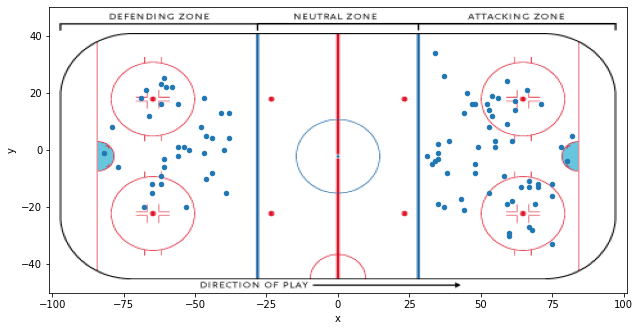

In [341]:
img = plt.imread('images/HockeyRink-Zones.png')
fig, ax = plt.subplots(figsize=(9, 10))
ax.imshow(img, extent=[-101, 101, -50, 50])
player_shots[player_shots['secondaryType']=='Slap Shot'].plot.scatter(x='x', y='y', ax=ax)
plt.tight_layout()

In [342]:
axax = teste[(teste['player_id']==id_player) & (teste['event']=='Goal')]

In [345]:
descript_series = list(axax['description'].unique())


In [358]:
descript_series

['Jarome Iginla (2) Wrist Shot, assists: Sidney Crosby (6), Paul Martin (5)',
 'Sidney Crosby (1) Wrist Shot, assists: Jarome Iginla (4), Evgeni Malkin (3)',
 'Sidney Crosby (2) Wrist Shot, assists: Pascal Dupuis (1), Mark Eaton (2)',
 'Jarome Iginla (1) Tip-In, assists: Kris Letang (1), Sidney Crosby (1)',
 'Pascal Dupuis (3) Tip-In, assists: Sidney Crosby (2), Chris Kunitz (1)',
 'Chris Kunitz (2) Snap Shot, assists: Sidney Crosby (3), Paul Martin (3)',
 'Pascal Dupuis (4) Deflected, assists: Chris Kunitz (2), Sidney Crosby (4)',
 'Sidney Crosby (3) Snap Shot, assists: Jarome Iginla (7), Pascal Dupuis (2)',
 'Kris Letang (2) Slap Shot, assists: Sidney Crosby (5), Paul Martin (4)',
 'Sidney Crosby (4) Wrist Shot, assists: Paul Martin (6), Matt Niskanen (2)',
 'Sidney Crosby (5) Wrist Shot, assists: Chris Kunitz (5), Kris Letang (6)',
 'Sidney Crosby (6) Slap Shot, assists: Kris Letang (7), Evgeni Malkin (11)',
 'James Neal (3) Snap Shot, assists: Sidney Crosby (7), Kris Letang (10)',


In [346]:
#eries.str.stats
description = []
for item in descript_series:
    if item.startswith(("Sidney Crosby ")):
        description.append(item)
    

In [350]:
only_gols = list()
for i in range(len(description)):
    coletado = axax[axax['description']== description[i]]
    only_gols.append(coletado)
    


295

In [351]:
df = pd.concat(only_gols)
        

In [354]:
df.shape

(311, 21)

In [357]:
df['secondaryType'].value_counts()

Wrist Shot     137
Snap Shot       56
Backhand        48
Tip-In          42
Slap Shot       18
Deflected        6
Wrap-around      4
Name: secondaryType, dtype: int64

In [355]:
# merge com locais dos goals
pkane_spot4 = pd.merge(df, patrick_kane_goals[['game_id', 'player_name','goals']], on='game_id')

In [356]:
pkane_spot4.shape

(0, 23)

In [289]:
pkane_spot4['secondaryType'].value_counts()

Wrist Shot     196
Backhand        48
Snap Shot       38
Slap Shot       21
Tip-In          10
Wrap-around      1
Deflected        1
Name: secondaryType, dtype: int64

1

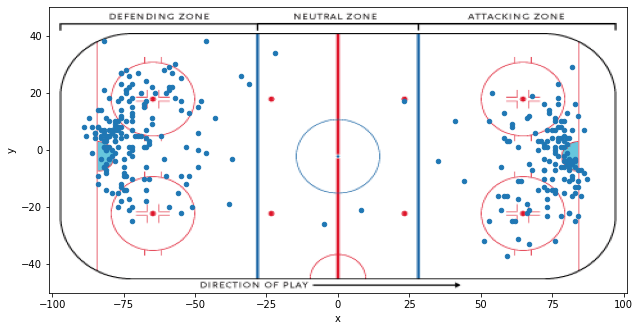

In [299]:
img = plt.imread('images/HockeyRink-Zones.png')
fig, ax = plt.subplots(figsize=(9, 10))
ax.imshow(img, extent=[-101, 101, -50, 50])
pkane_spot4.plot.scatter(x='x', y='y', ax=ax)
plt.tight_layout()

In [142]:
# subset com gols do patrick kane
patrick_kane_goals = game_skater_stats[(game_skater_stats['player_name']=='Patrick Kane') & (game_skater_stats['goals']>0)]
patrick_kane_goals.shape

(259, 26)

In [166]:
# merge com locais dos goals
pkane_spot = pd.merge(axax, patrick_kane_goals[['game_id', 'player_name','goals']], how='right', on='game_id')

In [257]:
pkane_spot[pkane_spot['description'].startswith('Patrick Kane')]

AttributeError: 'Series' object has no attribute 'startswith'

In [178]:
pkane_spot['secondaryType'].value_counts()

Wrist Shot     279
Backhand        63
Snap Shot       62
Slap Shot       59
Tip-In          20
Deflected        4
Wrap-around      1
Name: secondaryType, dtype: int64

In [171]:
pkane_spot2 = pkane_spot.drop_duplicates('game_id')

In [173]:
pkane_spot2['goals'].sum()

311

In [177]:
pkane_spot2['secondaryType']

0       Slap Shot
1      Wrist Shot
2       Deflected
3      Wrist Shot
6      Wrist Shot
          ...    
485    Wrist Shot
487    Wrist Shot
489           NaN
490           NaN
491           NaN
Name: secondaryType, Length: 259, dtype: object

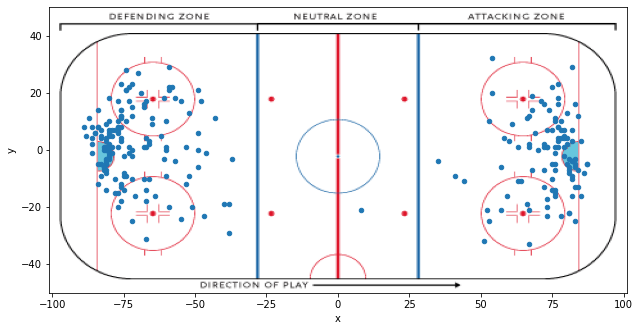

In [179]:
img = plt.imread('images/HockeyRink-Zones.png')
fig, ax = plt.subplots(figsize=(9, 10))
ax.imshow(img, extent=[-101, 101, -50, 50])
pkane_spot2.plot.scatter(x='x', y='y', ax=ax)
plt.tight_layout()

In [189]:
game_plays_player[(game_plays_player['player_id'] == 8474141) & (game_plays_player['playerType']=='Scorer')]

,play_id,game_id,play_num,player_id,playerType
20576,2012030232_74,2012030232,74,8474141,Scorer
21298,2012030233_252,2012030233,252,8474141,Scorer
48845,2010030155_65,2010030155,65,8474141,Scorer
73438,2012030324_167,2012030324,167,8474141,Scorer
73621,2012030325_37,2012030325,37,8474141,Scorer
...,...,...,...,...,...
5193100,2010021161_17,2010021161,17,8474141,Scorer
5198378,2018021069_156,2018021069,156,8474141,Scorer
5279307,2018021240_248,2018021240,248,8474141,Scorer
5286098,2018021255_82,2018021255,82,8474141,Scorer


In [188]:
game_plays_player['playerType'].unique()

array(['Winner', 'Loser', 'PlayerID', 'Blocker', 'Shooter', 'Goalie',
       'Hitter', 'Hittee', 'Scorer', 'Assist', 'PenaltyOn', 'DrewBy',
       'ServedBy'], dtype=object)

In [192]:
patrick_kane_goals

,game_id,team_name,player_name,nationality,primaryPosition,timeOnIce,goals,assists,points,shots,hits,powerPlayGoals,powerPlayAssists,PPP,penaltyMinutes,faceOffWins,faceoffTaken,takeaways,giveaways,shortHandedGoals,shortHandedAssists,blocked,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce
108803,2012030232,Blackhawks,Patrick Kane,USA,RW,1042,1,0,1,2,0,0,0,0,2,0,0,0,0,0,0,0,-2,912,0,130
108804,2012030233,Blackhawks,Patrick Kane,USA,RW,1404,1,0,1,4,0,0,0,0,0,0,0,1,1,0,0,0,0,976,63,365
108818,2010030155,Blackhawks,Patrick Kane,USA,RW,969,1,0,1,2,1,1,0,1,0,0,0,2,1,0,0,0,0,683,21,265
108830,2012030324,Blackhawks,Patrick Kane,USA,RW,1135,1,0,1,7,0,0,0,0,2,0,0,0,0,0,0,0,0,935,0,200
108831,2012030325,Blackhawks,Patrick Kane,USA,RW,1720,3,0,3,5,1,0,0,0,0,0,1,1,0,0,0,1,1,1601,0,119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109534,2010021005,Blackhawks,Patrick Kane,USA,RW,1340,1,1,2,2,0,0,0,0,0,0,0,0,2,0,0,1,2,1278,0,62
109535,2010021161,Blackhawks,Patrick Kane,USA,RW,1344,1,1,2,1,0,0,1,1,4,1,1,0,1,0,0,1,2,1142,0,202
109536,2018021069,Blackhawks,Patrick Kane,USA,RW,1003,1,0,1,3,0,0,0,0,0,0,0,1,0,0,0,0,1,914,5,84
109547,2018021240,Blackhawks,Patrick Kane,USA,RW,1411,1,1,2,6,0,0,0,0,0,0,0,1,2,0,0,0,0,1256,0,155
